In [107]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\USER\Desktop\VS code\Paper-reproduction\data\extracted_data\cs-training.csv'

df = pd.read_csv(file_path)


In [108]:
df.set_index('Unnamed: 0',inplace = True)
ISNAMonIncome = np.where(df['MonthlyIncome'].isna(), 1, 0)
df.insert(loc=6, column='ISNAMonIncome', value=ISNAMonIncome)
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(0)

ISNANOfDependents = np.where(df['NumberOfDependents'].isna(), 1, 0)
df.insert(loc=12, column='ISNANOfDependents', value=ISNANOfDependents)
df['NumberOfDependents']  = df['NumberOfDependents'].fillna(0)

df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,ISNAMonIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ISNANOfDependents
Unnamed: 0,,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,0,13,0,6,0,2.0,0
2,0,0.957151,40,0,0.121876,2600.0,0,4,0,0,0,1.0,0
3,0,0.658180,38,1,0.085113,3042.0,0,2,1,0,0,0.0,0
4,0,0.233810,30,0,0.036050,3300.0,0,5,0,0,0,0.0,0
5,0,0.907239,49,1,0.024926,63588.0,0,7,0,1,0,0.0,0


In [109]:
from scipy.stats import zscore

#Only Z score
df[['age','NumberOfDependents','NumberOfOpenCreditLinesAndLoans']] = df[['age','NumberOfDependents','NumberOfOpenCreditLinesAndLoans']].apply(zscore)

#Z score and log transform
select_cols = [1, 3, 4, 5, 8, 9, 10]
col_names = df.columns[select_cols].tolist()
df[col_names] = df[col_names].astype(float)
log_transformed = np.log(df[col_names] + 1e-10)
z_score_scaled = log_transformed.apply(zscore)
df[col_names] = z_score_scaled

df.rename(columns={df.columns[0]: 'y'}, inplace=True)

df.rename(columns=dict(zip(df.columns[1:], ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12'])), inplace=True)


In [110]:
from scipy.stats import skew, kurtosis
summary_statistics = df.describe().T

summary_statistics['skewness'] = df.apply(skew)
summary_statistics['excess kurtosis'] = df.apply(kurtosis) - 3

summary_statistics.drop(['count', '25%', '75%'], axis=1, inplace=True)

pd.DataFrame(summary_statistics)

,mean,std,min,50%,max,skewness,excess kurtosis
y,6.684000e-02,0.249746,0.000000,0.000000,1.000000,3.468822,7.032729
x1,-2.421056e-16,1.000003,-3.412202,0.284807,2.504713,-2.808335,3.898024
x2,9.274951e-17,1.000003,-3.540201,-0.019984,3.838715,0.188993,-3.494692
x3,-1.084288e-16,1.000003,-0.436038,-0.436038,2.785385,1.860114,-1.531647
x4,-1.153448e-17,1.000003,-4.350428,-0.091561,2.559738,-1.729110,4.809471
x5,-2.978358e-17,1.000003,-1.940778,0.501950,1.010429,-1.416510,-2.973672
x6,1.982067e-01,0.398650,0.000000,0.000000,1.000000,1.514082,-2.707557
x7,8.014922e-17,1.000003,-1.642610,-0.087984,9.628425,1.215302,0.090924
x8,-3.583030e-16,1.000003,-0.242416,-0.242416,4.879752,3.890441,10.173176
x9,-1.510140e-16,1.000003,-1.291484,0.741069,1.093187,-0.515069,-4.730262


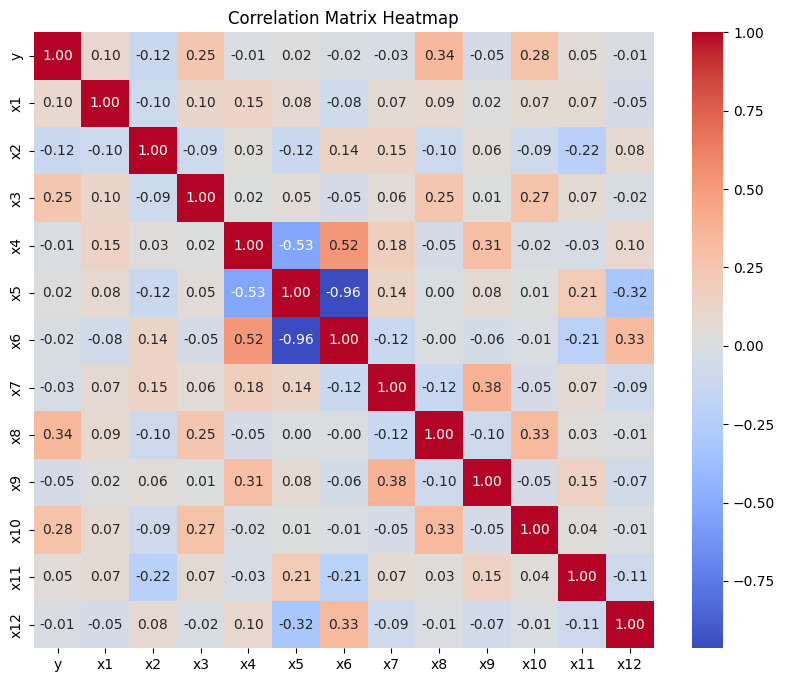

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif

def EW(data,y_column):
    return data

def REG(data, y_column):
    y = data[y_column]
    X = data.drop(columns=y_column)


    model = LinearRegression()
    model.fit(X, y)

    coefficients = model.coef_

    coef_mapping = dict(zip(X.columns, coefficients))

    weighted_features = X.multiply(coefficients, axis=1)

    df = pd.concat([y,weighted_features],axis=1)

    return df

def LR(data, y_column):

    y = data[y_column]
    X = data.drop(columns=y_column)

    model = LogisticRegression()
    model.fit(X, y)

    coefficients = model.coef_[0]

    coef_mapping = dict(zip(X.columns, coefficients))

    weighted_features = X.multiply(coefficients, axis=1)

    df = pd.concat([y,weighted_features],axis=1)

    return df


def MI(data, y_column):

    y = data[y_column]
    X = data.drop(columns=y_column)

    mi_scores = mutual_info_classif(X, y)

    mi_mapping = dict(zip(X.columns, mi_scores))

    weighted_features = X.multiply(mi_scores, axis=1)

    df = pd.concat([y,weighted_features],axis=1)

    return df

In [113]:
df_ew = EW(df,'y')
df_lr = LR(df,'y')
df_reg = REG(df,'y')
df_mi = MI(df,'y')

In [114]:
def pca_2d_reduction(df, y_column, title, ax):
    # 从DataFrame中提取特征和目标变量
    X = df.drop(columns=y_column)
    y = df[y_column]

    # 执行PCA降维
    pca = PCA(n_components=2, random_state=42)
    X_reduced = pca.fit_transform(X)

    # 在传入的坐标轴上绘制散点图
    ax.set_title(title, fontsize=14)
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', linewidths=2)

    # 在坐标轴上添加图例
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)


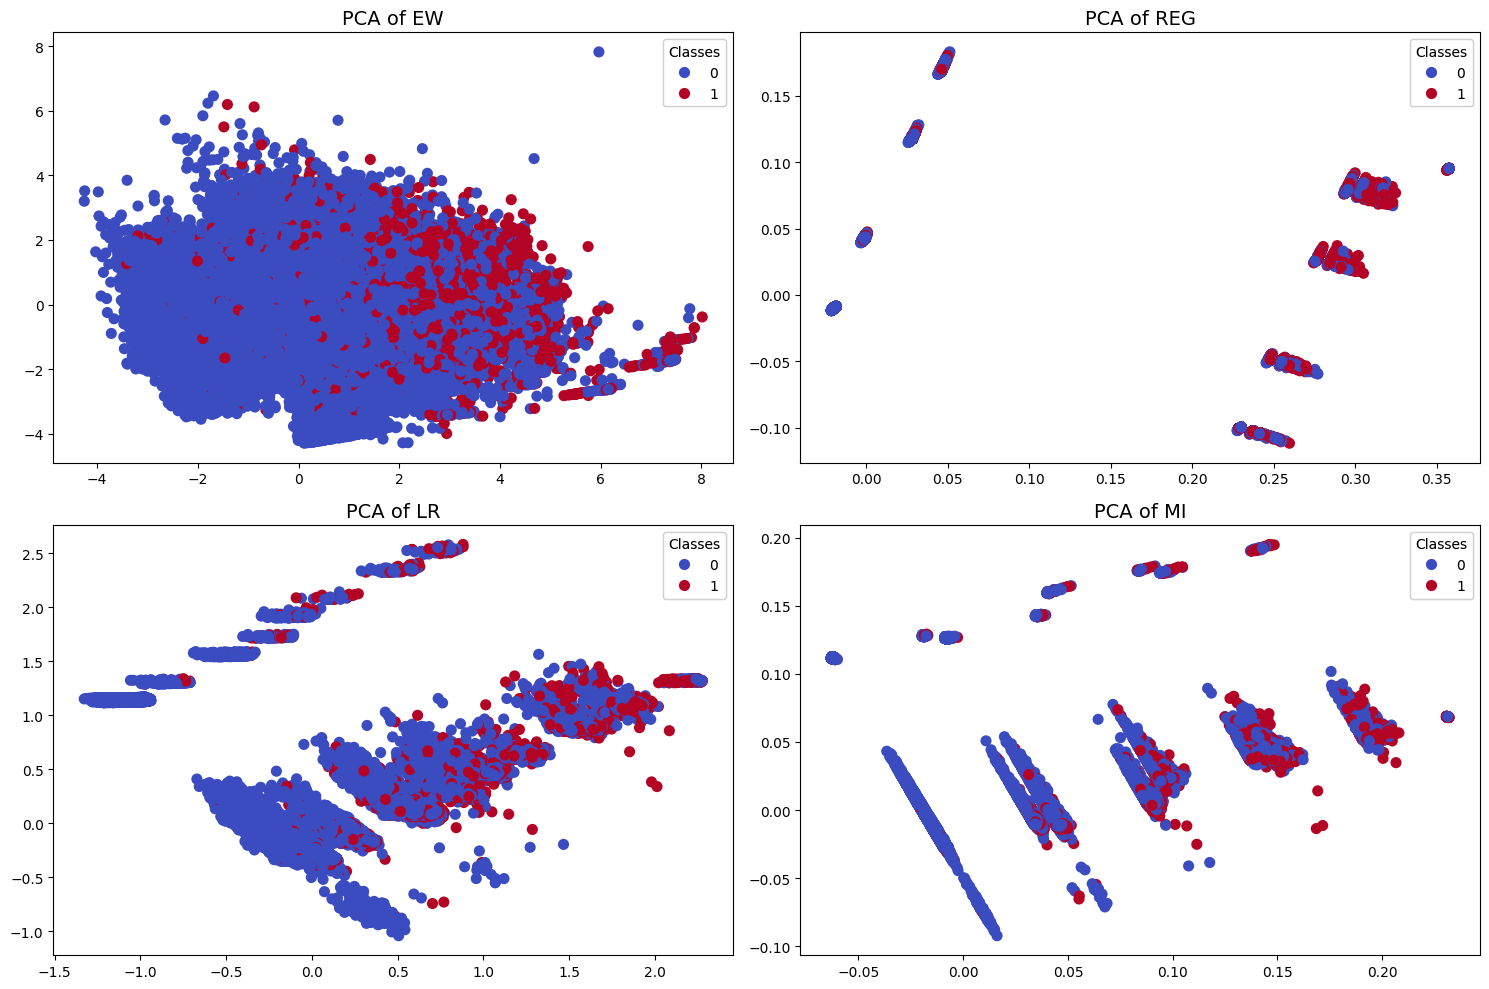

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

pca_2d_reduction(df_ew, 'y', 'PCA of EW', axs[0, 0])
pca_2d_reduction(df_lr, 'y', 'PCA of LR', axs[1, 0])
pca_2d_reduction(df_reg, 'y', 'PCA of REG', axs[0, 1])
pca_2d_reduction(df_mi, 'y', 'PCA of MI', axs[1, 1])

plt.tight_layout()
plt.show()   

In [118]:
from itertools import combinations

features = df.drop(columns='y')

new_features = {}

for col in features.columns:
    new_features[f'{col}^2'] = df[col] ** 2

for (col1, col2) in combinations(features.columns, 2):
    new_features[f'{col1}*{col2}'] = df[col1] * df[col2]
        

new_features_df = pd.DataFrame(new_features, index=df.index)

df_quar = pd.concat([df, new_features_df], axis=1)

In [120]:
features = df.drop(columns='y')

new_features = {}

for col in features.columns:
    new_features[f'{col}^2'] = df[col] ** 2
    new_features[f'{col}^3'] = df[col] ** 3

        
for (col1, col2) in combinations(features.columns, 2):
    new_features[f'{col1}*{col2}'] = df[col1] * df[col2]
    new_features[f'{col1}*{col2}^2'] = df[col1] * df[col2] ** 2
    new_features[f'{col1}^2*{col2}'] = df[col1] ** 2 * df[col2]
    new_features[f'{col1}*{col2}*{col1}'] = df[col1] * df[col2] * df[col1]
    new_features[f'{col1}*{col2}*{col2}'] = df[col1] * df[col2] * df[col2]

new_features_df = pd.DataFrame(new_features, index=df.index)

df_cubic = pd.concat([df, new_features_df], axis=1)


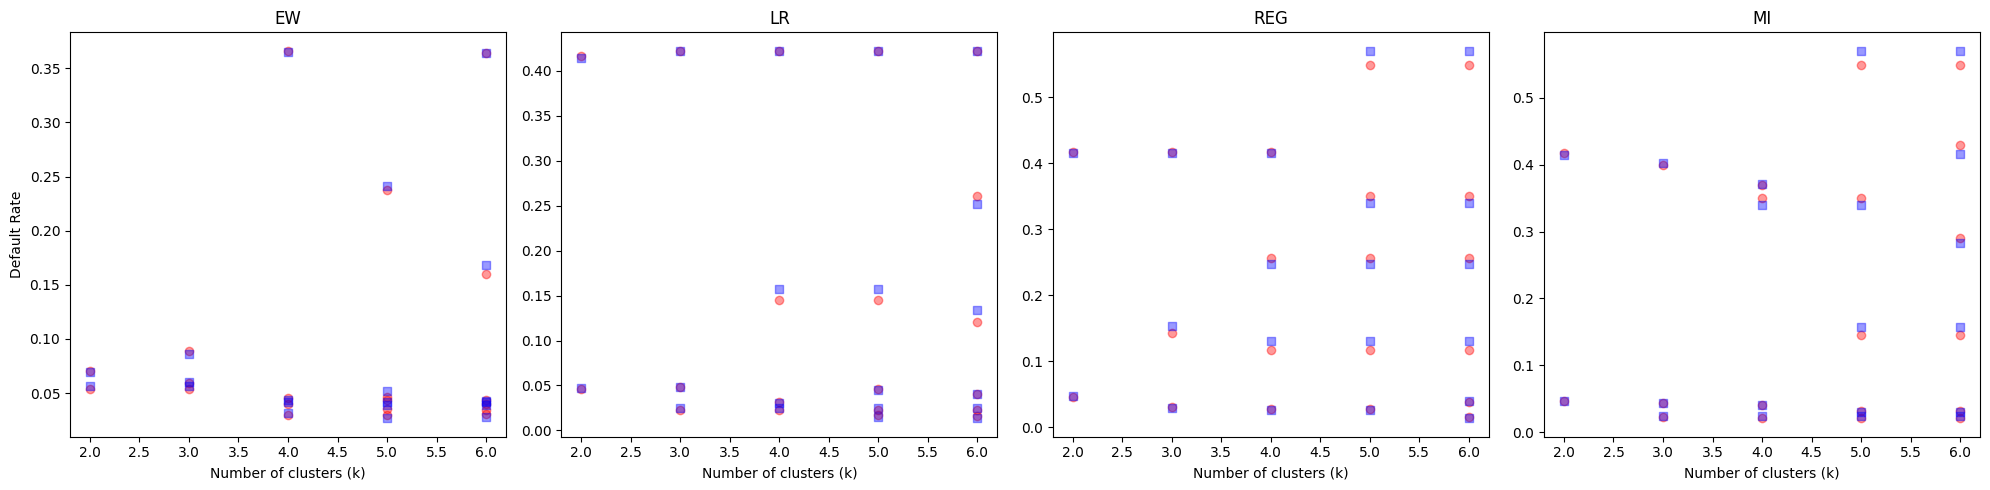

In [207]:
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

def entropy(p):
    return -(p * np.log(p + 1e-9) + (1 - p) * np.log(1 - p + 1e-9)) if 0 < p < 1 else 0


dfs = {'EW': df_ew, 'LR': df_lr, 'REG': df_reg, 'MI': df_mi}
k_values = range(2, 7)

# Dict to store default rates for train and test sets
train_rate = defaultdict(dict)
test_rate = defaultdict(dict)

for name, df in dfs.items():
    X = df.drop('y', axis=1)
    y = df['y']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_train)
        
        train_cluster_labels = kmeans.labels_
        train_default_rate = y_train.groupby(train_cluster_labels).mean()
        train_rate[name][k] = train_default_rate.values

        test_cluster_labels = kmeans.predict(X_test)
        test_default_rate = y_test.groupby(test_cluster_labels).mean()
        test_rate[name][k] = test_default_rate.values


fig, axes = plt.subplots(1, len(dfs), figsize=(20, 5))

for idx, (name, rates) in enumerate(train_rate.items()):
    ax = axes[idx]
    ax.set_title(name)
    ax.set_xlabel('Number of clusters (k)')
    if idx == 0:
        ax.set_ylabel('Default Rate')
    for k in k_values:
        ax.scatter([k] * len(rates[k]), rates[k], label='Train' if idx == 0 else "", color='red', marker='o',alpha=0.4)
        ax.scatter([k] * len(test_rate[name][k]), test_rate[name][k], label='Test' if idx == 0 else "", color='blue', marker='s',alpha = 0.4)

plt.tight_layout()
plt.show()       

In [204]:
def entropy(p):
    return -(p * np.log(p + 1e-9) + (1 - p) * np.log(1 - p + 1e-9)) if 0 < p < 1 else 0


dfs = {'EW': df_ew, 'LR': df_lr, 'REG': df_reg, 'MI': df_mi}
k_values = range(2, 7)

train_rate = defaultdict(dict)
test_rate = defaultdict(dict)

for name, df in dfs.items():
    X = df.drop('y', axis=1)
    y = df['y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_train)
        train_cluster_labels = kmeans.labels_

        cluster_sizes = np.bincount(train_cluster_labels)
        total_size = len(y_train)
        cluster_proportions = cluster_sizes / total_size

        train_default_rate = y_train.groupby(train_cluster_labels).mean().values
        train_cluster_entropies = np.array([entropy(p) for p in train_default_rate])
        train_weighted_entropy = np.sum(cluster_proportions * train_cluster_entropies)
        train_rate[name][k] = train_default_rate,train_weighted_entropy


In [205]:
train_rate

defaultdict(dict,
            {'EW': {2: (array([0.0699864 , 0.05404149]), 0.2450528190950382),
              3: (array([0.08901121, 0.05401973, 0.05910366]),
               0.24381100584628168),
              4: (array([0.04512753, 0.03008331, 0.03956614, 0.36615415]),
               0.20660511238536847),
              5: (array([0.04398905, 0.03576372, 0.02953352, 0.04643701, 0.23800023]),
               0.21629679395503282),
              6: (array([0.04357357, 0.03471688, 0.03045231, 0.03995222, 0.16028241,
                      0.3644982 ]),
               0.21285009088587376)},
             'LR': {2: (array([0.04612777, 0.41679093]), 0.21446228266105893),
              3: (array([0.04816794, 0.42187738, 0.02318303]),
               0.21384453304590406),
              4: (array([0.14547522, 0.42187738, 0.02318303, 0.03197587]),
               0.20287541955192737),
              5: (array([0.04554047, 0.42187738, 0.02318303, 0.01739151, 0.14547522]),
               0.20037312461791